In [1]:
import os

from pathlib import Path
from functools import partial

import matplotlib.pyplot as plt

from src.datasets.mvtec_ad import MVTecAD
from src.preprocessing import InferencePreprocessing

In [2]:
mvtec_dataset = partial(
    MVTecAD,
    dataset_dir=Path(os.environ["AD_DATASET_DIR"]),
    object=os.environ["AD_OBJECT"],
    sample_transform=InferencePreprocessing(
        target_img_width=int(os.environ["IMAGE_WIDTH"]),
        target_img_height=int(os.environ["IMAGE_HEIGHT"]),
    ),
)

ds_train = mvtec_dataset(training_set=True)
ds_test = mvtec_dataset(training_set=False, anomalies=["good"])

In [3]:
len(ds_test)

40

torch.Size([1, 256, 256])
tensor(0)


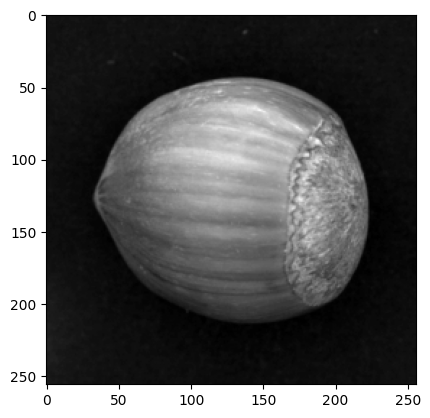

In [4]:
image, label = ds_test[20]
plt.imshow(image.movedim(0, -1), cmap="gray")
print(image.shape)
print(label)